<a href="https://colab.research.google.com/github/vaishnavshankar/Machine-Learning-Projects/blob/main/us_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project on Youtube Trending Videos Analysis with Python
The dataset that I will be using for the analysis of Youtube trending videos was collected over 205 days. For each of those days, the dataset contains data on trending videos for that day. It contains data on over 40,000 trending videos.We will analyze the data to get insight on trending YouTube videos, to see what is common among all trending videos. This information can also be used by people who want to increase the popularity of their videos on YouTube.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now let’s get started with the task of Youtube trending videos analysis with Python by importing the necessary Python libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')

# Load the Data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Classroom/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Summary statistics
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Exploratory Data Analysis

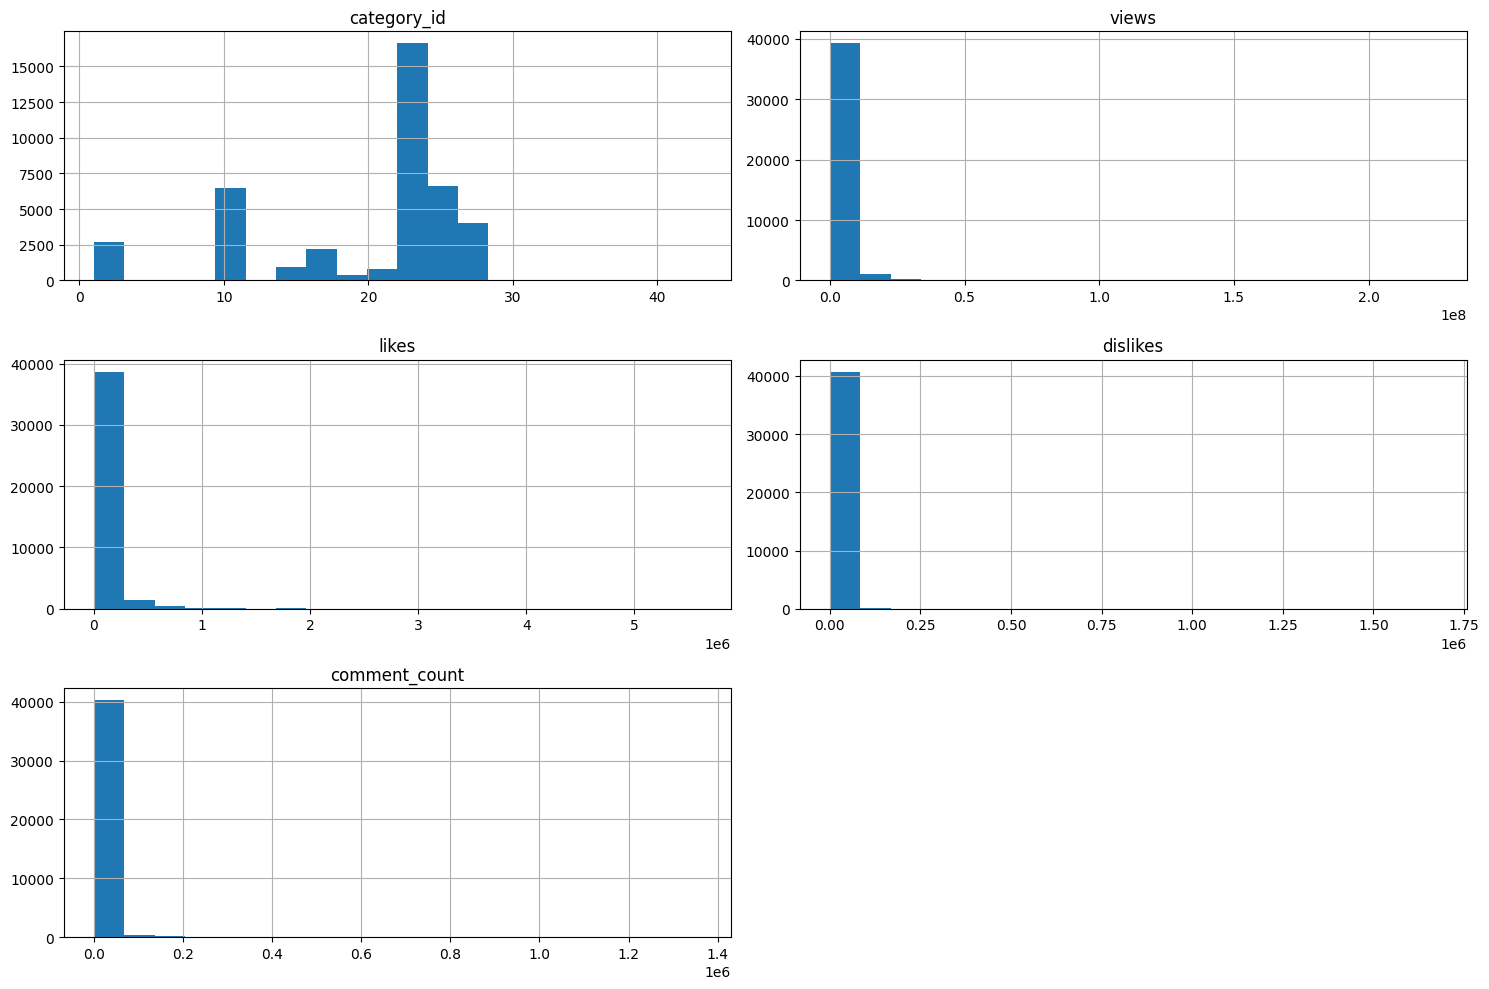

In [ ]:

# Plotting histograms for all numerical variables
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

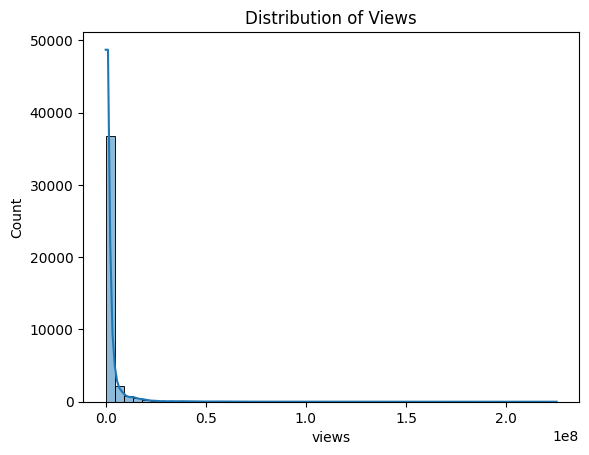

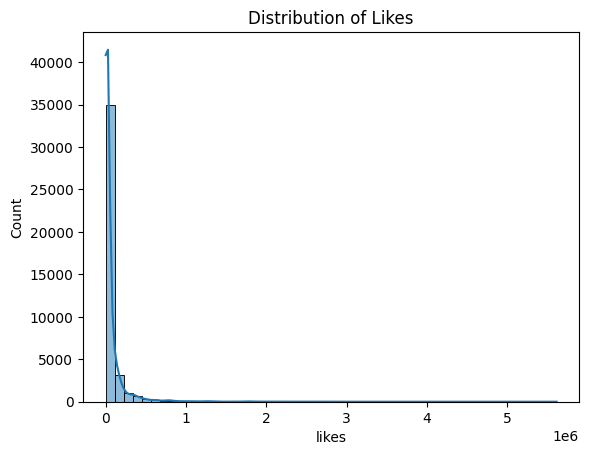

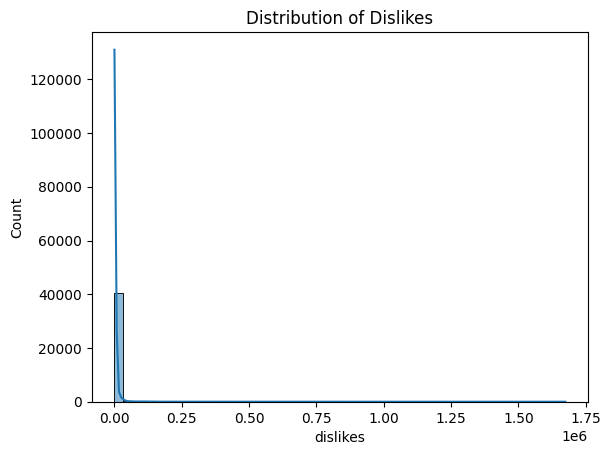

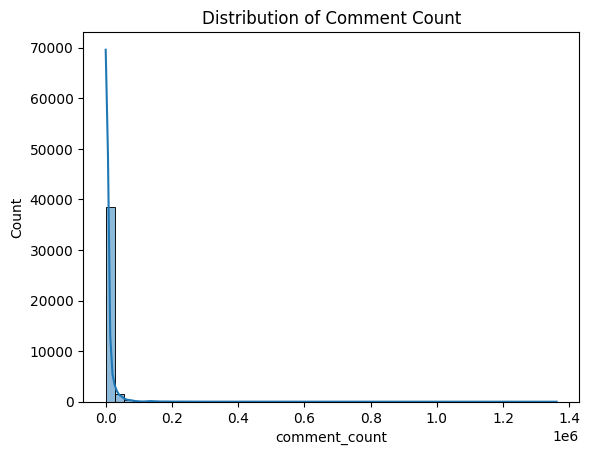

In [ ]:
# Distribution of views, likes, dislikes
sns.histplot(df['views'], bins=50, kde=True)
plt.title('Distribution of Views')
plt.show()

sns.histplot(df['likes'], bins=50, kde=True)
plt.title('Distribution of Likes')
plt.show()

sns.histplot(df['dislikes'], bins=50, kde=True)
plt.title('Distribution of Dislikes')
plt.show()

sns.histplot(df['comment_count'], bins=50, kde=True)
plt.title('Distribution of Comment Count')
plt.show()

Some of the data point lies far right under the distribution curve as views on some videos are way more because of their popularity. Study shows that vast majority of trending videos have 5 million views or less. To understand the relationship between variables explored the distribution of data between them using scatter plot

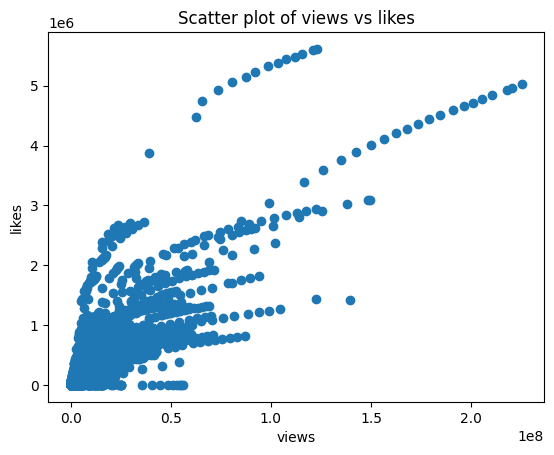

In [ ]:
plt.scatter(df['views'],df['likes'])
plt.title('Scatter plot of views vs likes')
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

Scatter plot shows the positive correlation between views and likes features.Number of likes increase with the number of views. Respectively there is a corelation between variables views,dislikes,comments_count etc.

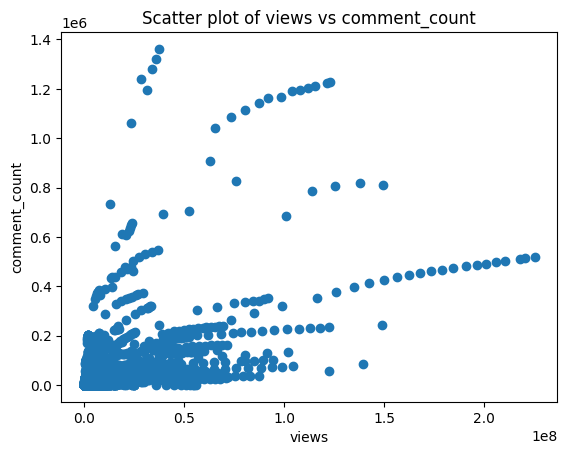

In [ ]:
plt.scatter(df['views'],df['comment_count'])
plt.title('Scatter plot of views vs comment_count')
plt.xlabel('views')
plt.ylabel('comment_count')
plt.show()

# Category Analysis

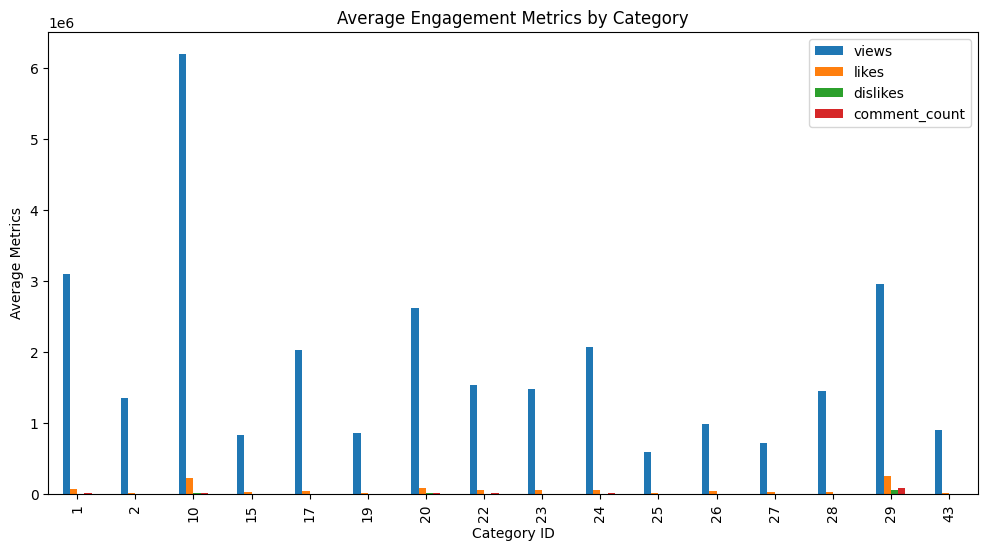

In [ ]:
# Group by category_id and calculate average views, likes, dislikes, and comments
category_stats = df.groupby('category_id').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Plotting engagement metrics by category
category_stats.plot(x='category_id', kind='bar', figsize=(12, 6))
plt.title('Average Engagement Metrics by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Metrics')
plt.show()

# Time Seris Analysis

In [ ]:
# Convert trending_date to datetime
df = df[pd.to_datetime(df['trending_date'], errors='coerce').notna()]

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

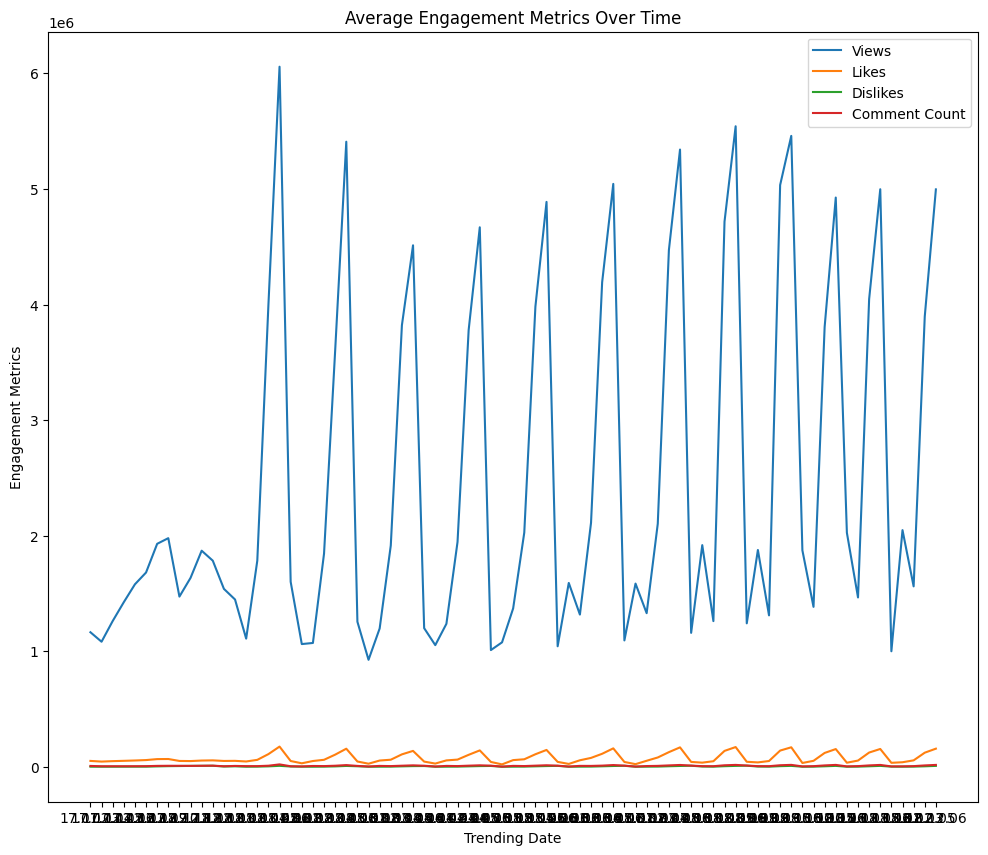

In [ ]:
# Group by trending date to see trends over time
date_stats = df.groupby('trending_date').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Plot trends over time
plt.figure(figsize=(12,10 ))
plt.plot(date_stats['trending_date'], date_stats['views'], label='Views')
plt.plot(date_stats['trending_date'], date_stats['likes'], label='Likes')
plt.plot(date_stats['trending_date'], date_stats['dislikes'], label='Dislikes')
plt.plot(date_stats['trending_date'], date_stats['comment_count'], label='Comment Count')
plt.legend()
plt.xlabel('Trending Date')
plt.ylabel('Engagement Metrics')
plt.title('Average Engagement Metrics Over Time')
plt.show()

In [ ]:
df['tags'].dtypes

dtype('O')

In [ ]:
df['tags'].isnull().sum()

0

In [ ]:
df['tags'] = df['tags'].astype(str)
df['tags'] = df['tags'].fillna('')

# Tag and Title Analysis
I am adding another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

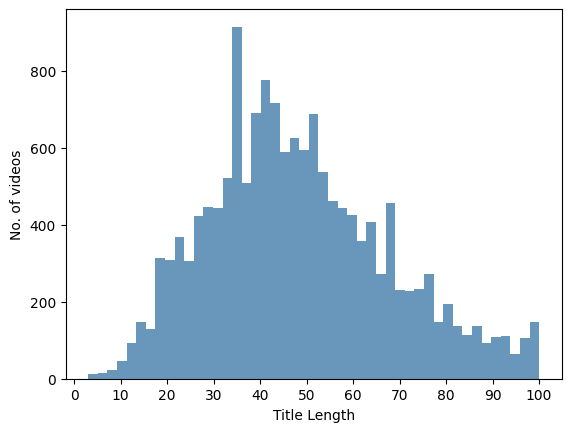

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color='#6897BB', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that the videos title length distribution looks like a normal distribution, where most videos have a title length of around 30-60 characters. Now, I am drawing a scatter plot to analyze the relationship between the title length and the number of views:

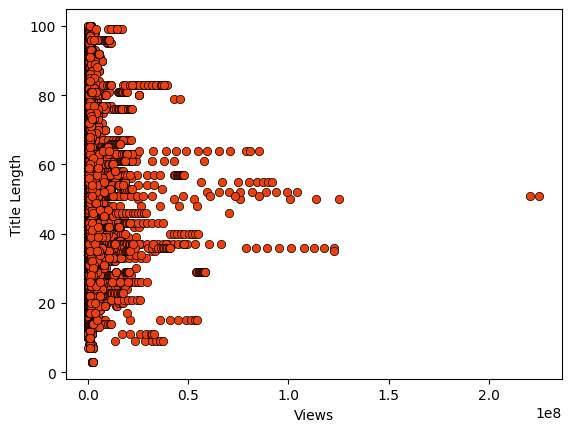

In [ ]:
#Impact of Title length on views
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color='#ed400c', edgecolors='0', linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 40 and 60 characters or so.

Let’s see if some words are used meaningfully in trending video tags. I am drawing a word cloud for the tags of our trending videos, which is a way to visualize the most common words in the tags; the more common the word, the larger its font-size:

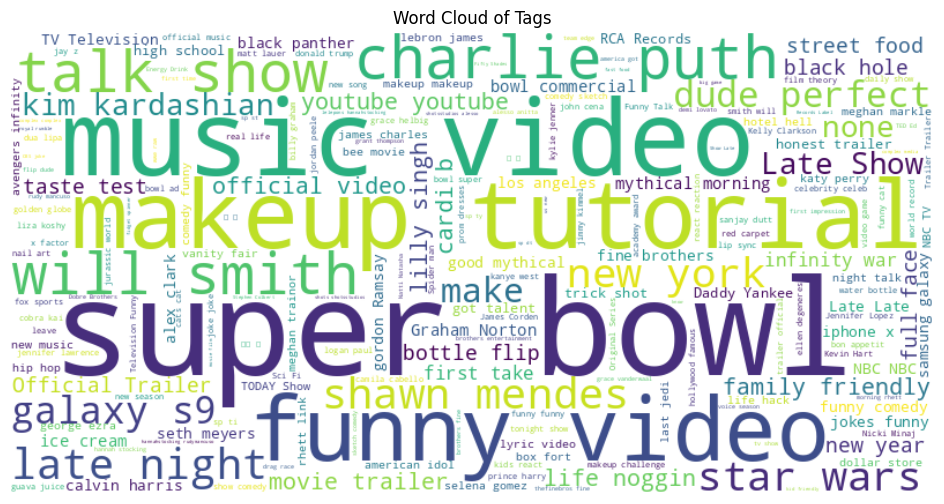

In [ ]:
# Create a word cloud of tags
from wordcloud import WordCloud

all_tags = ' '.join(df['tags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()



Trending videos contains tags like funny video,latest, punjabi ,song, new etc.helps attracting the viewer's attention.

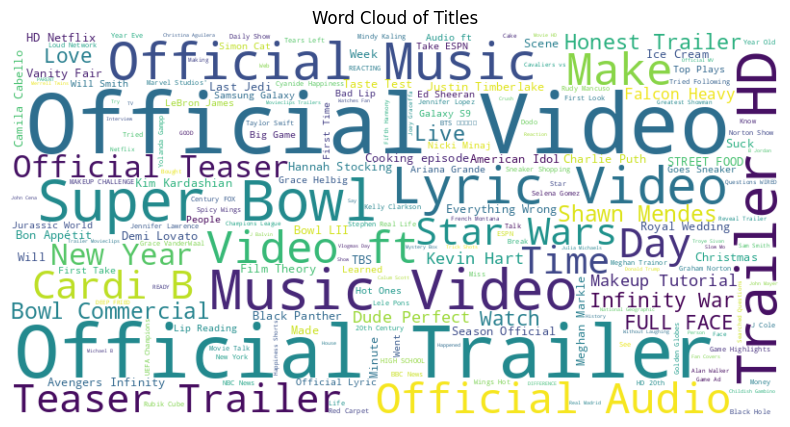

In [ ]:
#For titles
all_titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

Trending videos contain words like Official, Trailer, Full,Episode, ETV, Telugu etc. which
helps attracting the viewer’s attention.

# The impact of publishing day in the trendiness of a video.

In [ ]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df['Publishing_day']=df['publish_time'].dt.day

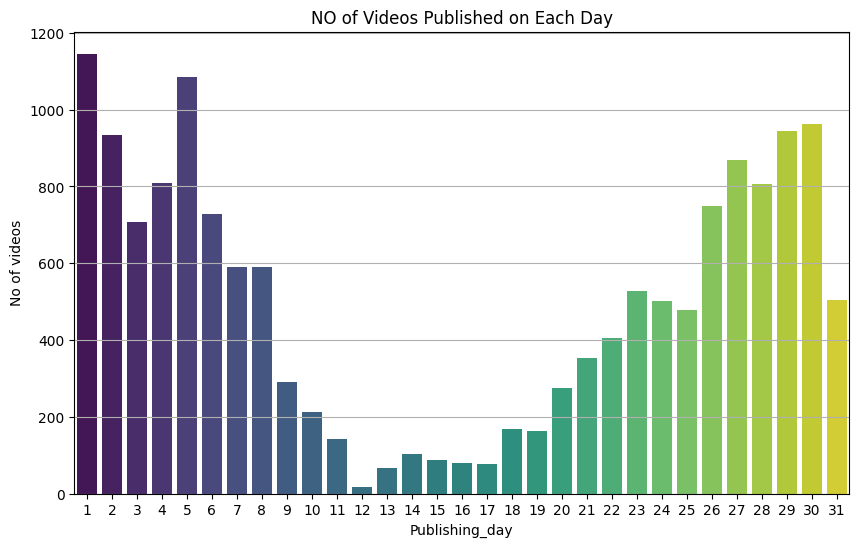

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Publishing_day',data=df,palette='viridis')
plt.title("NO of Videos Published on Each Day")
plt.xlabel('Publishing_day')
plt.ylabel('No of videos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


From the plot we learns that number of videos published on starting month
is more than the number of videos uploaded on the middle and at the end of the month.

# The impact of publishing time in the trendiness of a video.

In [ ]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df['Publishing_hour']=df['publish_time'].dt.hour

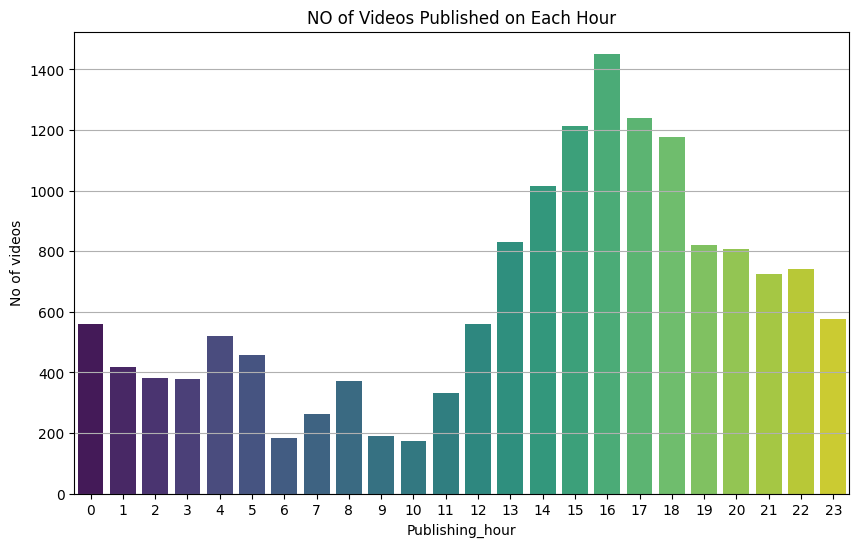

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Publishing_hour',data=df,palette='viridis')
plt.title("NO of Videos Published on Each Hour")
plt.xlabel('Publishing_hour')
plt.ylabel('No of videos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

From the plot we can learn that number of videos published around 2pm-6pm is more
than the number of videos uploaded at morning and night

# **Data Preprocessing**

In [ ]:
columns_to_remove=['thumbnail_link','comments_disabled','ratings_disabled','description','video_id']
df=df.drop(columns=columns_to_remove)

In [ ]:
df.dtypes

trending_date                          object
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
video_error_or_removed                   bool
title_length                            int64
Publishing_day                          int32
Publishing_hour                         int32
dtype: object

In [ ]:
#Converting categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['video_error_or_removed']=le.fit_transform(df['video_error_or_removed'])
df['trending_date']=le.fit_transform(df['trending_date'])
df['title']=le.fit_transform(df['title'])
df['channel_title']=le.fit_transform(df['channel_title'])
df['tags']=le.fit_transform(df['tags'])



In [ ]:
df.dtypes

trending_date                           int64
title                                   int64
channel_title                           int64
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                    int64
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
video_error_or_removed                  int64
title_length                            int64
Publishing_day                          int32
Publishing_hour                         int32
dtype: object

Plotted Correlation between the variables to determine the best features for forecasting.

In [ ]:
corr_matrix=df.corr()
print(corr_matrix)

                        trending_date     title  channel_title  category_id  \
trending_date                1.000000  0.020550      -0.011131    -0.023355   
title                        0.020550  1.000000       0.146583     0.035218   
channel_title               -0.011131  0.146583       1.000000     0.056078   
category_id                 -0.023355  0.035218       0.056078     1.000000   
publish_time                 0.217021  0.003310      -0.024661     0.008886   
tags                        -0.030999  0.131731       0.178180     0.114396   
views                        0.065481 -0.022208      -0.054693    -0.166049   
likes                        0.053210 -0.016960      -0.021432    -0.174889   
dislikes                     0.008318  0.025182      -0.002977    -0.014101   
comment_count                0.024142  0.010771       0.018784    -0.055327   
video_error_or_removed      -0.001418 -0.028555      -0.005714    -0.022678   
title_length                -0.013343 -0.043213     

Text(0.5, 1.0, 'Correlation Matrix')

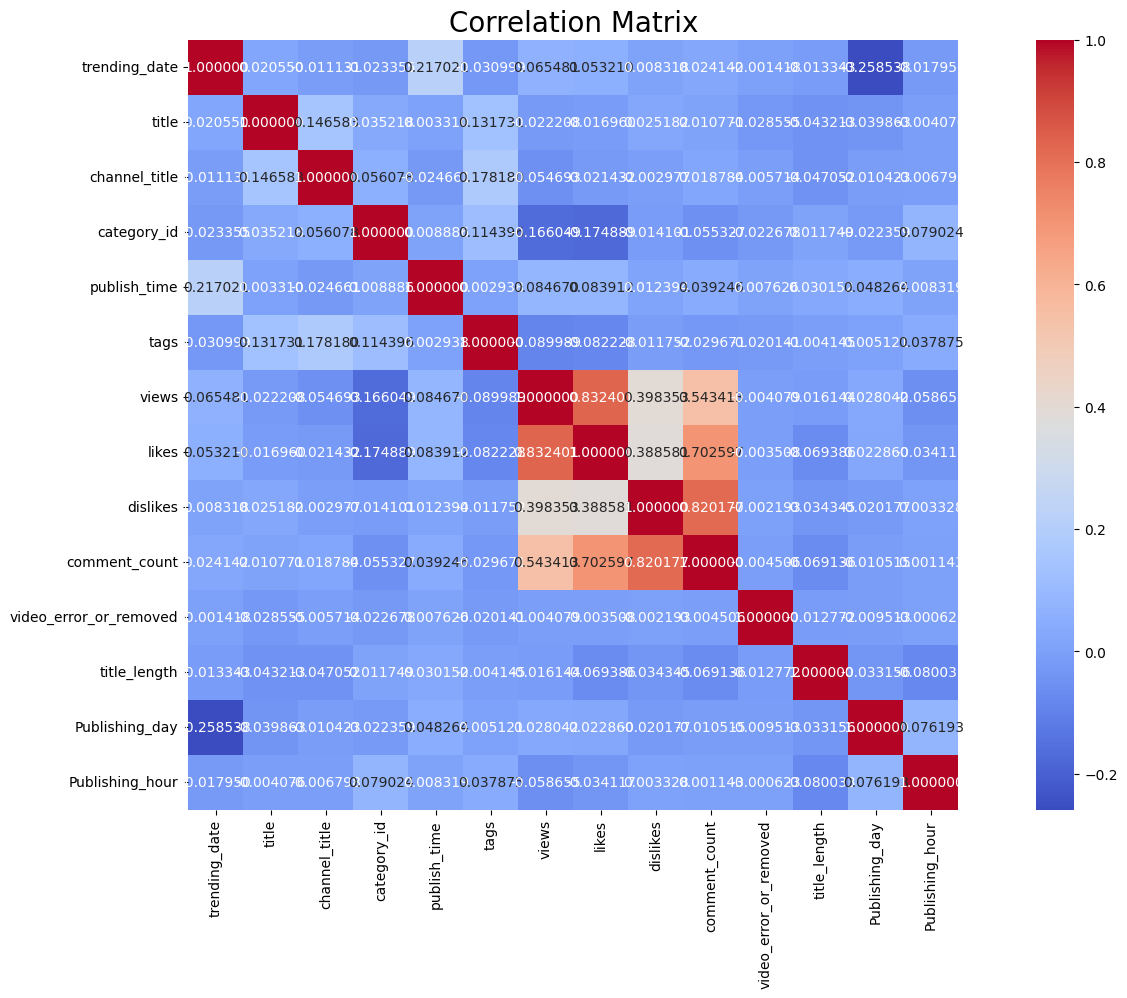

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,fmt="2f",cmap='coolwarm',cbar=True,square=True)
plt.title('Correlation Matrix',size=20)

Correlation map denotes that variables such as views, likes, dislikes, comment_counts have
positive correlation with each other.

# Predicting the number of views
Creating new features that might be relevant for prediction

In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
# Extract additional features from publish_time
df['publish_day'] = df['publish_time'].dt.day
df['publish_month'] = df['publish_time'].dt.month
df['publish_year'] = df['publish_time'].dt.year
df['publish_hour'] = df['publish_time'].dt.hour

In [ ]:
# Defining features and target variable
X = df.drop(columns=['views', 'likes', 'dislikes', 'comment_count', 'title', 'channel_title', 'tags','publish_time'])
y = df['views']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Machine': SVR()
}


In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [ ]:
# Display results
df = pd.DataFrame(results).transpose()
df.index.name = 'Model'
df.columns = ['MAE', 'MSE', 'R2']
df

,MAE,MSE,R2
Model,,,
Linear Regression,2.623943e+06,3.962139e+13,0.045413
Decision Tree,5.010297e+05,5.219019e+12,0.874260
Random Forest,5.914649e+05,4.465561e+12,0.892413
Gradient Boosting,2.317503e+06,2.968100e+13,0.284904
Support Vector Machine,2.097351e+06,4.425713e+13,-0.066274


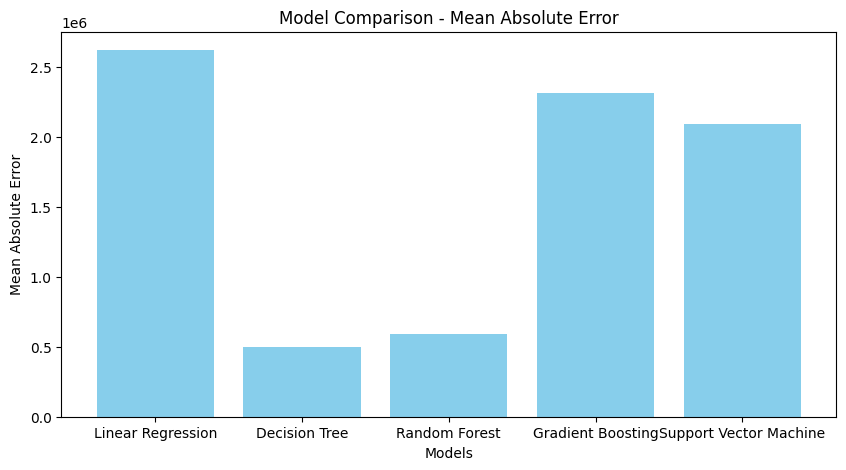

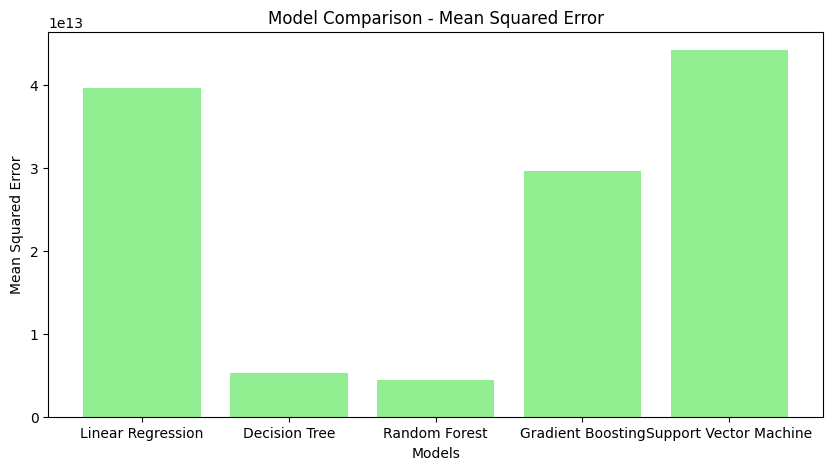

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE
mae_values = [metrics['MAE'] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison - Mean Absolute Error')
plt.show()
# Plotting MSE
mse_values = [metrics['MSE'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - Mean Squared Error')
plt.show()


The result shows that Randon Forest models and Decision Tree has less Mean Absolute Error and Mean Square Error compared to Linear Regression ,gradient Boosting and SVM

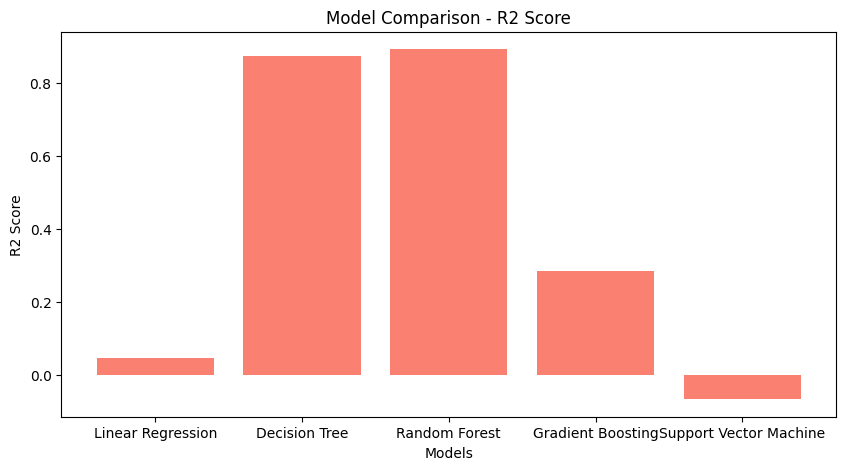

In [ ]:
# Plotting R2 Scores
r2_values = [metrics['R2'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.show()


Results show that Random Forest Regressor, Decision Tree  give better performance thanGradient Boosting, Linear Regresson and SVM for forecasting.Random Forest Regression is comparatively better model for predicting the number of views.I choose Random Forest sice it has the best score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [ ]:
# Training the RandomForestRegressor on the entire dataset
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Predicting the number of days on the test set
predictions = model.predict(X_test)

In [ ]:
# Displaying a few predictions
for i in range(10):  # Display first 10 predictions
    print(f"Actual Views: {y_test.iloc[i]}, Predicted Views: {predictions[i]}")

Actual Views: 395630, Predicted Views: 557964.14
Actual Views: 398250, Predicted Views: 343498.14
Actual Views: 1980510, Predicted Views: 2707888.26
Actual Views: 557481, Predicted Views: 530718.55
Actual Views: 378366, Predicted Views: 437413.01
Actual Views: 154250, Predicted Views: 665597.95
Actual Views: 271104, Predicted Views: 356863.31
Actual Views: 595874, Predicted Views: 614191.46
Actual Views: 2424701, Predicted Views: 1920000.27
Actual Views: 2583939, Predicted Views: 2576518.95



# Predicting the number of days video will take to get on trending list

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Classroom/USvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Handling missing values
data = data.dropna()

In [ ]:
# Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['category_id'] = label_encoder.fit_transform(data['category_id'])
data['comments_disabled'] = label_encoder.fit_transform(data['comments_disabled'])
data['ratings_disabled'] = label_encoder.fit_transform(data['ratings_disabled'])
data['video_error_or_removed'] = label_encoder.fit_transform(data['video_error_or_removed'])

In [ ]:
# Create target variable: days to trend
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['days_to_trend'] = (data['trending_date'] - data['publish_time']).dt.days

In [ ]:
# Drop rows with negative or zero days_to_trend
data = data[data['days_to_trend'] > 0]

# Feature selection
features = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
X = data[features]
y = data['days_to_trend']

In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Machine': SVR()
}

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [ ]:
# Displaying results
for model, metrics in results.items():
    print(f'{model} - MAE: {metrics["MAE"]}, MSE: {metrics["MSE"]}, R2: {metrics["R2"]}')

Linear Regression - MAE: 20.522356174412153, MSE: 20258.629348907096, R2: 0.0019503206493712844
Decision Tree - MAE: 6.7154677699185905, MSE: 7805.77672494328, R2: 0.6154452098787955
Random Forest - MAE: 8.716227145335647, MSE: 4613.47579705058, R2: 0.7727152236887824
Gradient Boosting - MAE: 16.7981192564768, MSE: 11775.363792137347, R2: 0.4198818757887145
Support Vector Machine - MAE: 13.217750536328191, MSE: 20438.47218355394, R2: -0.006909710321207241


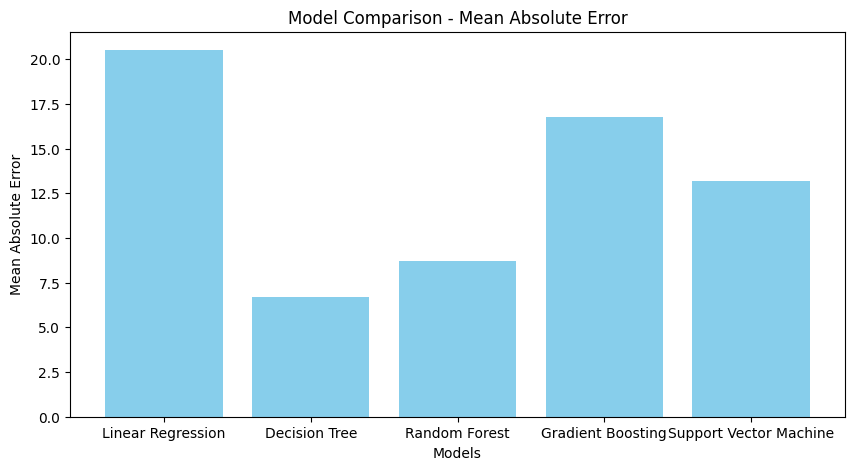

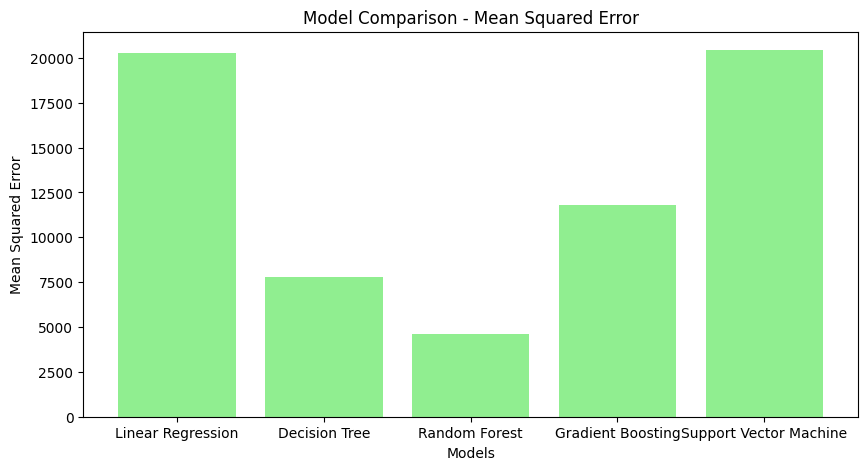

In [ ]:
# Plotting MAE
mae_values = [metrics['MAE'] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison - Mean Absolute Error')
plt.show()
# Plotting MSE
mse_values = [metrics['MSE'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - Mean Squared Error')
plt.show()

The bar charts shows that Randon Forest models and Decision Tree has less Mean Absolute Error and Mean Square Error compared to Linear Regression ,gradient Boosting and SVM

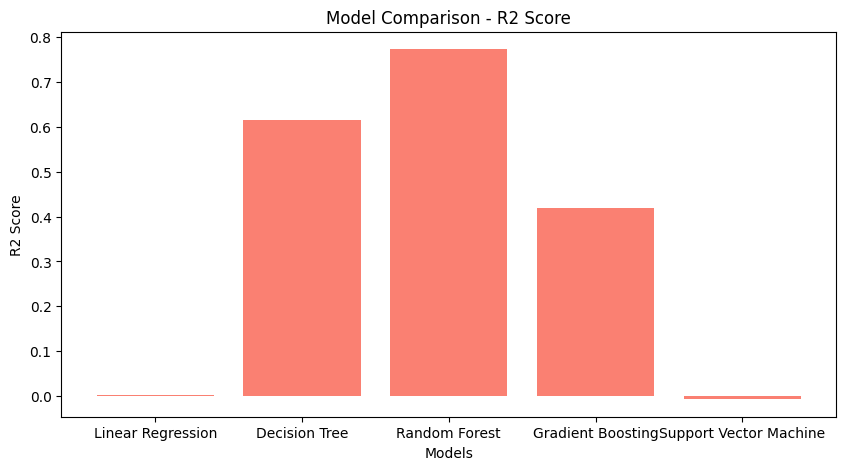

In [ ]:
# Plotting R2 Scores
r2_values = [metrics['R2'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.show()

Results show that Random Forest Regressor, Decision Tree and Gradient Boosting Regressor give better performance than Linear Regresson and SVM for forecasting.Random Forest Regression is comparatively better model for predicting the number of days a video will take to get on the trending list.

In [ ]:
# Training the RandomForestRegressor on the entire dataset
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predicting the number of days on the test set
predictions = model.predict(X_test)

In [ ]:
# Display a few predictions
for i in range(10):  # Display first 10 predictions
    print(f"Actual days: {y_test.iloc[i]}, Predicted days: {predictions[i]}")

Actual days: 10, Predicted days: 9.47
Actual days: 5, Predicted days: 6.25
Actual days: 16, Predicted days: 14.67
Actual days: 4, Predicted days: 5.41
Actual days: 1, Predicted days: 3.45
Actual days: 10, Predicted days: 11.2
Actual days: 19, Predicted days: 13.32
Actual days: 8, Predicted days: 5.69
Actual days: 6, Predicted days: 4.33
Actual days: 5, Predicted days: 5.18


Predicting the Number of Days a Video will take to get on trending using a sample

In [ ]:
new_video_data = {
    'category_id': [1],  # Example category_id
    'views': [50000],    # Example views
    'likes': [1000],     # Example likes
    'dislikes': [50],    # Example dislikes
    'comment_count': [200],  # Example comment count
    'comments_disabled': [0],  # Example comments_disabled
    'ratings_disabled': [0],  # Example ratings_disabled
    'video_error_or_removed': [0]  # Example video_error_or_removed
}


In [ ]:
# Converting new video data to DataFrame
new_video_df = pd.DataFrame(new_video_data)

# Normalizing new video data
new_video_df = scaler.transform(new_video_df)

# Predicting the number of days for the new video
new_video_prediction = model.predict(new_video_df)
print(f"Predicted number of days the new video will take to get on trending list: {new_video_prediction[0]}")

Predicted number of days the new video will take to get on trending list: 2.78
